<a href="https://colab.research.google.com/github/Mcflurrins/242saurus/blob/main/NDC_RegRumbles_Personal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Collection

Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
import scipy.cluster.hierarchy as shc
import math

In [2]:
df = pd.read_csv('train.csv')
df

,measurement_id,depth_reading_time,water_temperature_50m,salinity_50m,oxygen_saturation_50m,perceived_water_density,sediment_deposition,seafloor_pressure,plankton_density,microplankton_density,...,significant_wave_height (m),bottom_current_shear_stress (Pa),sound_speed_water (m s-1),acoustic_backscatter_intensity (dB),turbidity (NTU),light_attenuation_coefficient_Kd (m⁻¹),bioluminescence_intensity (photons cm-2 s-1),Brunt_Vaisala_frequency_squared (s-2),mixed_layer_depth (m),hydrostatic_pressure
0,16356,2023-11-13 11:00:00,304.05,21.7,"22,6","36,7",NaN,NaN,39.0,NaN,...,0.401154,0.015067,1504.138019,-66.767810,2.952915,0.384820,2.538261e+03,0.000076,NaN,1.0126
1,19332,NaN,NaN,20.2,"22,2","33,1",0.1,0.9883,33.0,20.0,...,1.481549,0.007174,1491.318842,-63.139064,7.009667,0.862321,3.134133e+03,0.000043,13.230404,1.0120
2,6357,2022-09-22 20:00:00,297.25,12.4,NaN,29,"0,1",0.9879,98.0,57.0,...,0.100000,0.013852,1488.067501,-84.915545,0.865869,0.146561,2.193647e+04,0.000186,93.919612,1.0120
3,15781,NaN,NaN,25.6,NaN,"36,4",NaN,0.9886,11.0,NaN,...,0.100000,0.009847,1507.774767,NaN,1.603203,0.184376,6.817096e+02,0.000039,86.371817,1.0120
4,17022,2023-12-11 05:00:00,296.75,13.6,"21,5","27,8",NaN,0.9862,92.0,89.0,...,0.675384,0.009419,1500.014574,-59.258579,4.589184,0.622330,3.462258e+05,0.000032,NaN,1.0103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15316,11965,2023-05-14 12:00:00,NaN,19.3,"21,8","31,3",NaN,0.9898,NaN,64.0,...,1.595885,0.009156,1482.875454,-68.781853,2.155646,0.287993,1.147424e+02,0.000040,18.473356,1.0136
15317,21576,NaN,NaN,12.1,"22,7","28,5",NaN,0.9889,45.0,19.0,...,1.345377,0.026626,1502.302766,-78.865019,1.523277,0.181620,1.162185e+04,0.000075,47.460715,1.0130
15318,5391,2022-08-13 14:00:00,297.55,NaN,NaN,29,NaN,NaN,100.0,87.0,...,0.421682,0.060896,1507.742278,-81.101029,0.931122,NaN,7.728941e+01,0.000107,76.010407,1.0103
15319,861,2022-02-05 20:00:00,NaN,12.7,NaN,"29,1","0,8",0.9849,66.0,1.0,...,1.687218,0.023251,1501.611227,-66.412329,6.027462,0.725824,1.049713e+06,0.000190,31.821102,1.0089


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15321 entries, 0 to 15320
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   measurement_id                                15321 non-null  int64  
 1   depth_reading_time                            12966 non-null  object 
 2   water_temperature_50m                         7314 non-null   float64
 3   salinity_50m                                  12010 non-null  float64
 4   oxygen_saturation_50m                         12338 non-null  object 
 5   perceived_water_density                       14331 non-null  object 
 6   sediment_deposition                           10296 non-null  object 
 7   seafloor_pressure                             12177 non-null  float64
 8   plankton_density                              10125 non-null  float64
 9   microplankton_density                         11000 non-null 

In [4]:
df_test = pd.read_csv('test.csv')
df_test

,measurement_id,depth_reading_time,water_temperature_50m,salinity_50m,oxygen_saturation_50m,perceived_water_density,sediment_deposition,seafloor_pressure,plankton_density,microplankton_density,...,sea_surface_height_anomaly (cm),significant_wave_height (m),bottom_current_shear_stress (Pa),sound_speed_water (m s-1),acoustic_backscatter_intensity (dB),turbidity (NTU),light_attenuation_coefficient_Kd (m⁻¹),bioluminescence_intensity (photons cm-2 s-1),Brunt_Vaisala_frequency_squared (s-2),mixed_layer_depth (m)
0,7102,2022-10-23 21:00:00,297.05,13.0,"22,2","27,7",0,0.9890,NaN,29.0,...,NaN,0.100000,0.003546,1507.920597,-74.648150,1.734582,0.261459,NaN,0.000140,85.439005
1,14935,2023-09-15 06:00:00,NaN,14.2,"16,8","21,2",0,0.9904,90.0,100.0,...,-17.949206,0.100000,0.040274,1517.126096,-82.550102,0.759634,0.137901,6.459511e+01,0.000033,84.440373
2,16495,2023-11-19 06:00:00,296.35,11.2,"22,6","28,1","0,1",0.9888,93.0,97.0,...,0.290784,0.895821,0.009551,1508.050665,-67.976551,3.190862,NaN,1.274921e+04,0.000121,76.514184
3,10942,2023-04-01 21:00:00,NaN,14.2,"20,8","26,5",0,0.9875,38.0,NaN,...,-3.699932,NaN,0.024491,1493.570462,-64.463885,5.040131,0.651114,NaN,0.000118,10.000000
4,12600,2023-06-09 23:00:00,NaN,13.6,NaN,"28,2",0,0.9882,20.0,20.0,...,1.963447,2.326241,0.017023,1502.137240,-73.688667,1.494758,0.241723,NaN,0.000063,44.414882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6562,2929,2022-05-03 00:00:00,NaN,13.0,"21,5","26,9",0,0.9860,34.0,5.0,...,-5.354638,1.449091,NaN,1504.406514,-65.417801,4.795729,0.630454,2.023151e+05,0.000073,12.678136
6563,18338,2024-02-04 01:00:00,296.35,12.7,"21,7","26,5",NaN,0.9886,40.0,8.0,...,-8.138225,2.356837,0.015486,1498.980780,-61.337324,6.678813,0.789441,2.546458e+06,0.000100,30.519802
6564,18006,2024-01-21 05:00:00,NaN,NaN,"20,4","24,7",0.0,0.9869,NaN,10.0,...,3.823478,1.936358,0.021822,1497.518049,-68.288505,5.876499,0.716775,2.382370e+06,0.000060,40.020882
6565,5837,2022-09-01 04:00:00,NaN,11.5,"21,6",27,0,0.9861,NaN,100.0,...,3.921698,0.355885,0.022101,1493.517816,-77.394004,1.432130,0.167513,6.286258e+03,0.000146,90.797481


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6567 entries, 0 to 6566
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   measurement_id                                6567 non-null   int64  
 1   depth_reading_time                            5604 non-null   object 
 2   water_temperature_50m                         3061 non-null   float64
 3   salinity_50m                                  5100 non-null   float64
 4   oxygen_saturation_50m                         5313 non-null   object 
 5   perceived_water_density                       6150 non-null   object 
 6   sediment_deposition                           4461 non-null   object 
 7   seafloor_pressure                             5278 non-null   float64
 8   plankton_density                              4427 non-null   float64
 9   microplankton_density                         4736 non-null   f

In [6]:
missing_values = df.isnull().sum()

missing_columns = missing_values[missing_values > 0]

print("Missing values by column:\n")
print(missing_columns)

Missing values by column:

depth_reading_time                              2355
water_temperature_50m                           8007
salinity_50m                                    3311
oxygen_saturation_50m                           2983
perceived_water_density                          990
sediment_deposition                             5025
seafloor_pressure                               3144
plankton_density                                5196
microplankton_density                           4321
mesoplankton_density                            3897
macroplankton_density                           2699
dissolved_gas_pressure                          2611
current_velocity_near_surface                   5486
current_velocity_deep                           2883
current_direction_near_surface                  3236
current_direction_deep                          3377
current_turbulence                              4794
sediment_temperature_0_to_10cm                  2920
sediment_temperatur

# 2. Data Preprocessing

In [7]:
# Convert depth_reading_time to datetime
df['depth_reading_time'] = pd.to_datetime(df['depth_reading_time'], errors='coerce')

# List of columns to convert from object (comma decimals) to float
float_columns = [
    'oxygen_saturation_50m', 'perceived_water_density', 'sediment_deposition',
    'dissolved_gas_pressure', 'current_turbulence',
    'sediment_porosity_0_to_10cm', 'sediment_porosity_10_to_30cm',
    'sediment_porosity_30_to_100cm', 'sediment_porosity_100_to_250cm',
    'perpendicular_light_intensity', 'thermal_emissions'
]

# Replace commas with dots and convert to float
for col in float_columns:
    df[col] = df[col].astype(str).str.replace(',', '.')
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15321 entries, 0 to 15320
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   measurement_id                                15321 non-null  int64         
 1   depth_reading_time                            12966 non-null  datetime64[ns]
 2   water_temperature_50m                         7314 non-null   float64       
 3   salinity_50m                                  12010 non-null  float64       
 4   oxygen_saturation_50m                         12338 non-null  float64       
 5   perceived_water_density                       14331 non-null  float64       
 6   sediment_deposition                           10296 non-null  float64       
 7   seafloor_pressure                             12177 non-null  float64       
 8   plankton_density                              10125 non-null  floa

In [9]:
# Convert depth_reading_time to datetime
df_test['depth_reading_time'] = pd.to_datetime(df_test['depth_reading_time'], errors='coerce')

# List of columns to convert from object (comma decimals) to float
float_columns = [
    'oxygen_saturation_50m', 'perceived_water_density', 'sediment_deposition',
    'dissolved_gas_pressure', 'current_turbulence',
    'sediment_porosity_0_to_10cm', 'sediment_porosity_10_to_30cm',
    'sediment_porosity_30_to_100cm', 'sediment_porosity_100_to_250cm',
    'perpendicular_light_intensity', 'thermal_emissions'
]

# Replace commas with dots and convert to float
for col in float_columns:
    df_test[col] = df_test[col].astype(str).str.replace(',', '.')
    df_test[col] = pd.to_numeric(df_test[col], errors='coerce')


# Exploratory Data Analysis

## Converting Datetime to Numeric

In [10]:
# Convert to datetime if not already
df['depth_reading_time'] = pd.to_datetime(df['depth_reading_time'], errors='coerce')
df_test['depth_reading_time'] = pd.to_datetime(df_test['depth_reading_time'], errors='coerce')

# Use the minimum time from df
min_time = df['depth_reading_time'].min()

# Convert to numeric based on the shared reference
df['depth_reading_time_numeric'] = (df['depth_reading_time'] - min_time) // pd.Timedelta('1s')
df_test['depth_reading_time_numeric'] = (df_test['depth_reading_time'] - min_time) // pd.Timedelta('1s')

# Drop original datetime columns
df = df.drop(columns=['depth_reading_time'])
df_test = df_test.drop(columns=['depth_reading_time'])


## Correlation Heatmap, Only for Corrs above 0.3

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Liberation Sans.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Liberation Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


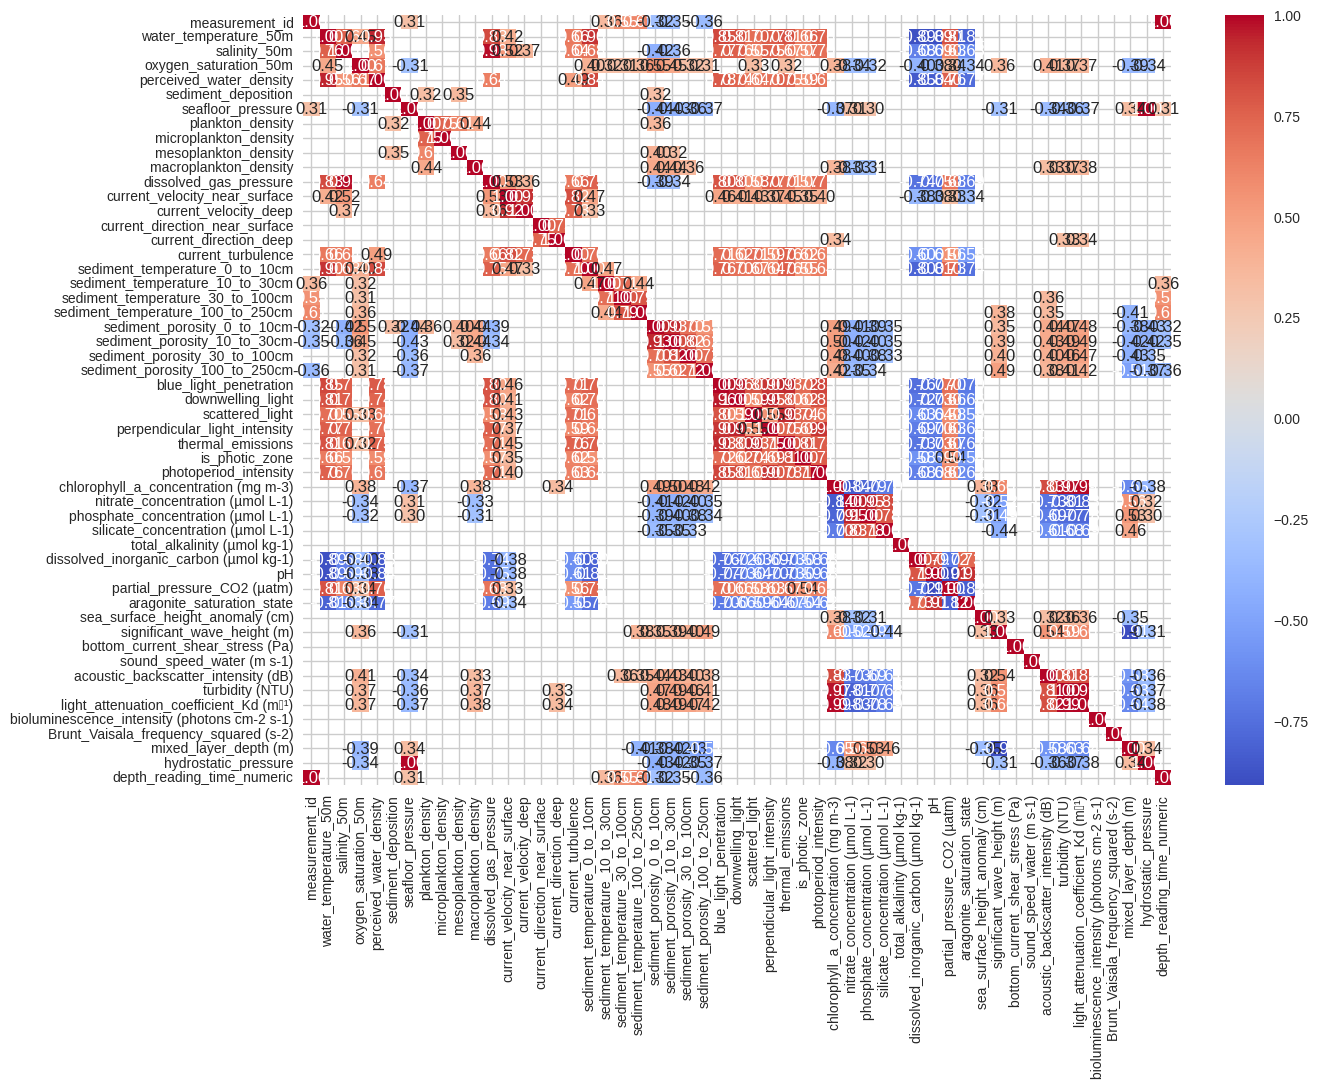

In [11]:
corr = df.corr()
mask = abs(corr) < 0.3
plt.figure(figsize=(14, 10))
sns.heatmap(corr.mask(mask), cmap='coolwarm', annot=True, fmt=".2f")

In [12]:
# --- 1. Compute Correlations & Find “Sparse” Features ---
corr = df.corr().abs()

threshold     = 0.4   # consider ‘high’ correlation - EARLIER WE TRIED 0.1 THRESHOLD AND ONLY DROPPED TILL 1 STRONG NEIGHBOUR
min_neighbors = 5     # require at least 5 strong friends

sparse_summary = []
for feat in corr.columns:
    count = (corr[feat].drop(feat) >= threshold).sum()
    sparse_summary.append({
        "feature": feat,
        "n_strong_neighbors": count,
        "sparse": (count < min_neighbors)
    })

sparse_df = pd.DataFrame(sparse_summary).set_index("feature")
print("\n=== Sparse Correlation Summary ===")
print(sparse_df.sort_values("n_strong_neighbors").head(20))
# any feature with sparse_df.loc[f,'sparse']==True is “sparse”


=== Sparse Correlation Summary ===
                                              n_strong_neighbors  sparse
feature                                                                 
sediment_deposition                                            0    True
bottom_current_shear_stress (Pa)                               0    True
bioluminescence_intensity (photons cm-2 s-1)                   0    True
Brunt_Vaisala_frequency_squared (s-2)                          0    True
sea_surface_height_anomaly (cm)                                0    True
total_alkalinity (µmol kg-1)                                   0    True
sound_speed_water (m s-1)                                      0    True
current_direction_near_surface                                 1    True
current_direction_deep                                         1    True
microplankton_density                                          1    True
mesoplankton_density                                           1    True
current_velocit

In [13]:
# Define the columns to drop
cols_to_drop = [
    'bioluminescence_intensity (photons cm-2 s-1)',
    'sound_speed_water (m s-1)',
    'bottom_current_shear_stress (Pa)',
    'Brunt_Vaisala_frequency_squared (s-2)',
    'total_alkalinity (µmol kg-1)'
]

# Drop from both df and df_test
df = df.drop(columns=cols_to_drop, errors='ignore')
df_test = df_test.drop(columns=cols_to_drop, errors='ignore')

In [14]:
# --- 2. Drop features with fewer than n strong neighbors ---
to_drop = sparse_df[sparse_df['n_strong_neighbors'] < 2].index.tolist()

df = df.drop(columns=to_drop, errors='ignore')
df_test = df_test.drop(columns=to_drop, errors='ignore')

## Outlier Information

In [15]:
for col in df.select_dtypes(include='number'):
    series = df[col].dropna()
    Q1, Q3 = series.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

    mask = (df[col] < lower) | (df[col] > upper)
    count = mask.sum()
    pct = count / len(df) * 100
    outliers = df.loc[mask, col].dropna().unique()
    sample_outliers = outliers[:5]

    # Calculate deviation from bounds in terms of IQR
    deviations = []
    for val in sample_outliers:
        if val < lower:
            deviation = (lower - val) / IQR
            deviations.append(f"{val:.2f} ({-deviation:.2f}×IQR below)")
        elif val > upper:
            deviation = (val - upper) / IQR
            deviations.append(f"{val:.2f} ({deviation:.2f}×IQR above)")
        else:
            deviations.append(f"{val:.2f} (inside bounds)")  # unlikely

    print(f"{col:40s}  outliers: {count:5d}  ({pct:5.2f}%)  sample: {deviations}")

measurement_id                            outliers:     0  ( 0.00%)  sample: []
water_temperature_50m                     outliers:    52  ( 0.34%)  sample: ['291.25 (-0.00×IQR below)', '305.65 (0.24×IQR above)', '290.85 (-0.12×IQR below)', '305.55 (0.21×IQR above)', '307.45 (0.76×IQR above)']
salinity_50m                              outliers:   416  ( 2.72%)  sample: ['25.60 (1.08×IQR above)', '23.20 (0.42×IQR above)', '22.30 (0.17×IQR above)', '26.50 (1.33×IQR above)', '25.30 (1.00×IQR above)']
oxygen_saturation_50m                     outliers:   407  ( 2.66%)  sample: ['16.90 (-0.66×IQR below)', '17.40 (-0.39×IQR below)', '16.20 (-1.03×IQR below)', '15.90 (-1.18×IQR below)', '17.20 (-0.50×IQR below)']
perceived_water_density                   outliers:   236  ( 1.54%)  sample: ['19.30 (-0.47×IQR below)', '20.90 (-0.06×IQR below)', '38.60 (0.47×IQR above)', '19.00 (-0.55×IQR below)', '37.70 (0.24×IQR above)']
seafloor_pressure                         outliers:    33  ( 0.22%)  samp

# Feature Engineering

## Winsorizing >10% outliers and Clipping 2-10% outliers

In [16]:
# 2. Compute IQR bounds and outlier stats
outlier_info = {}
bounds = {}

for col in df.select_dtypes(include="number").columns:
    s = df[col].dropna()
    Q1, Q3 = s.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    bounds[col] = (lower, upper)

    mask = (df[col] < lower) | (df[col] > upper)
    pct = mask.sum() / len(df) * 100
    outlier_info[col] = pct

# 3. Classify columns by their outlier rate
heavy_thresh    = 10.0   # >10% → heavy
moderate_thresh = 2.0    # 2–10% → moderate
#columns with less than 2% outliers are ignored

heavy_cols    = [c for c,p in outlier_info.items() if p >= heavy_thresh]
moderate_cols = [c for c,p in outlier_info.items() if moderate_thresh <= p < heavy_thresh]

print("Heavy outlier columns (will Winsorize):", heavy_cols)
print("Moderate outlier columns (will Clip):", moderate_cols)

# 4. Clip moderate columns at IQR bounds
for col in moderate_cols:
    low, high = bounds[col]
    df[col] = df[col].clip(lower=low, upper=high)

# 5. Winsorize heavy columns at their 5th/95th percentiles
for col in heavy_cols:
    p05, p95 = df[col].quantile([0.05, 0.95])
    df[col] = df[col].clip(lower=p05, upper=p95)

# 6. Verify
print("\nPost-processing outlier percentages:")
for col in heavy_cols + moderate_cols:
    s = df[col].dropna()
    Q1, Q3 = s.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    pct_after = ((df[col] < lower) | (df[col] > upper)).sum() / len(df) * 100
    print(f"{col:40s} → {pct_after:5.2f}% now beyond IQR bounds")

Heavy outlier columns (will Winsorize): []
Moderate outlier columns (will Clip): ['salinity_50m', 'oxygen_saturation_50m', 'dissolved_gas_pressure', 'sediment_porosity_0_to_10cm', 'downwelling_light']

Post-processing outlier percentages:
salinity_50m                             →  0.00% now beyond IQR bounds
oxygen_saturation_50m                    →  0.00% now beyond IQR bounds
dissolved_gas_pressure                   →  0.00% now beyond IQR bounds
sediment_porosity_0_to_10cm              →  0.00% now beyond IQR bounds
downwelling_light                        →  0.00% now beyond IQR bounds



Low outlier columns (<2%, not clipped or winsorized):
  water_temperature_50m                    →  0.34% outliers
  perceived_water_density                  →  1.54% outliers
  seafloor_pressure                        →  0.22% outliers
  current_velocity_near_surface            →  1.51% outliers
  current_velocity_deep                    →  0.74% outliers
  current_turbulence                       →  0.13% outliers
  sediment_temperature_0_to_10cm           →  0.59% outliers
  sediment_temperature_10_to_30cm          →  0.97% outliers
  blue_light_penetration                   →  0.01% outliers
  scattered_light                          →  1.38% outliers
  nitrate_concentration (µmol L-1)         →  0.03% outliers
  phosphate_concentration (µmol L-1)       →  0.05% outliers
  silicate_concentration (µmol L-1)        →  0.24% outliers
  dissolved_inorganic_carbon (µmol kg-1)   →  0.38% outliers
  pH                                       →  0.27% outliers
  partial_pressure_CO2 (µatm) 

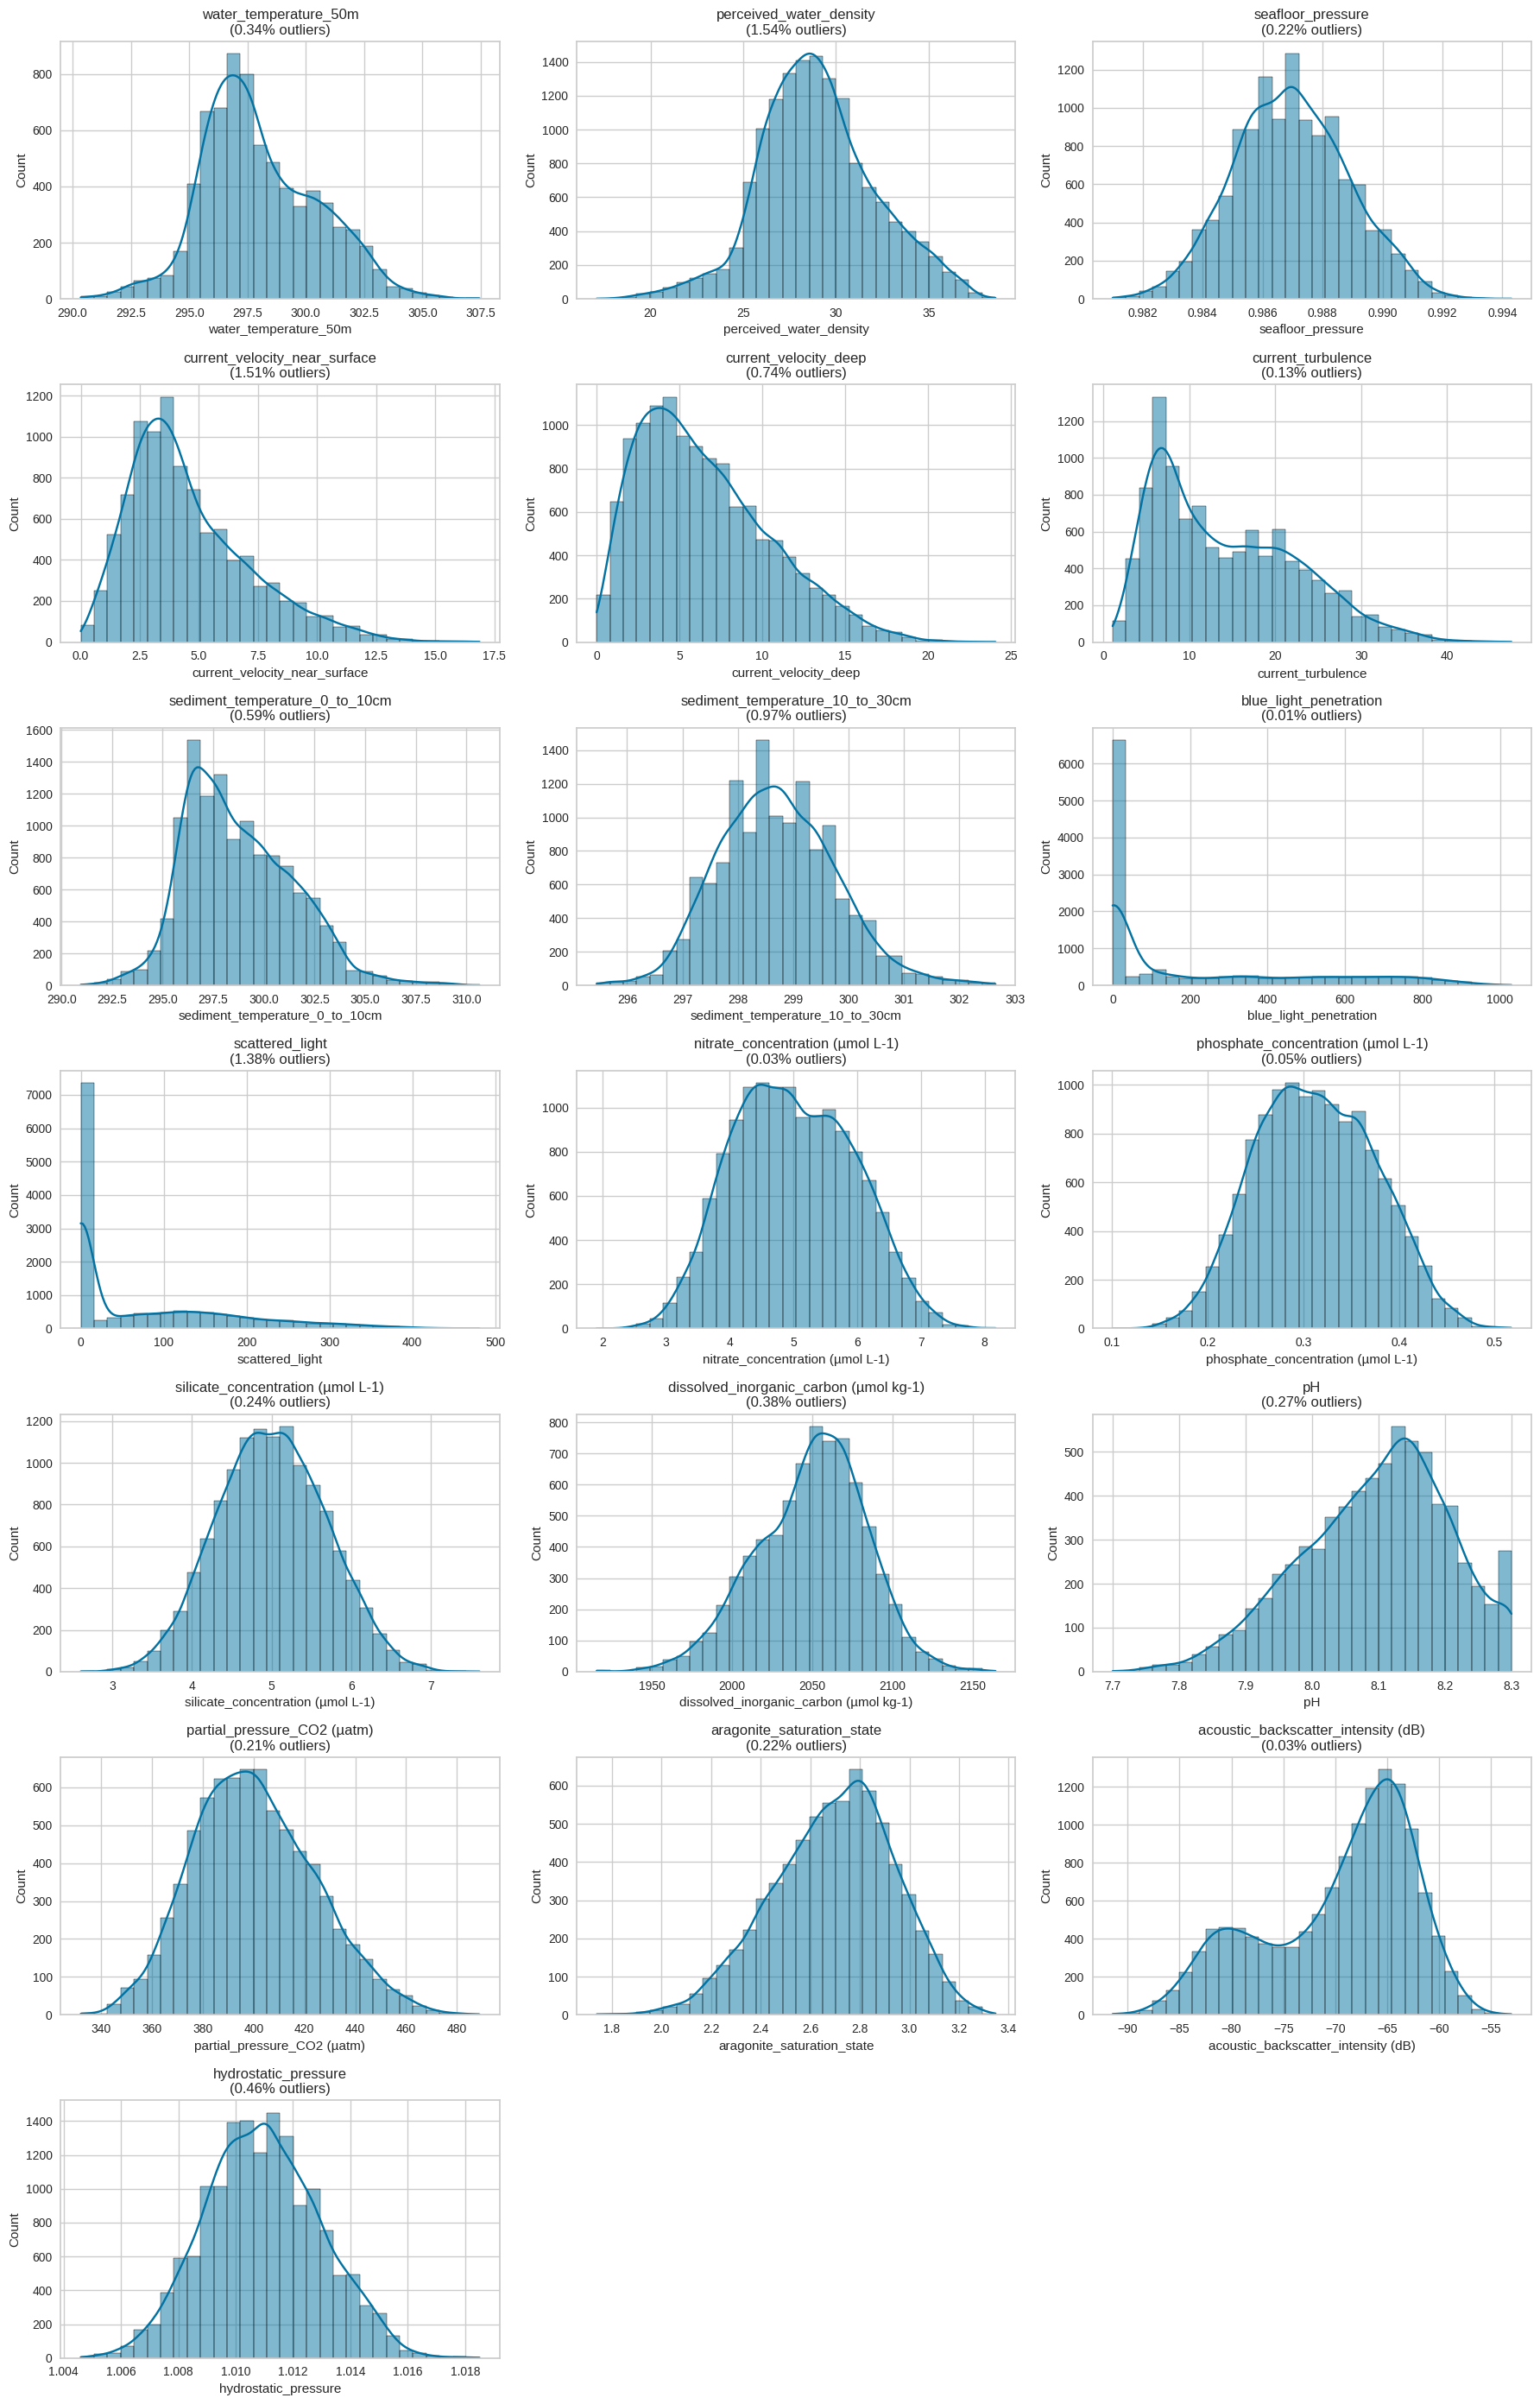

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 7. Analyze low-outlier columns (<2%)
low_outlier_cols = [c for c, p in outlier_info.items() if 0 < p < moderate_thresh]

print("\nLow outlier columns (<2%, not clipped or winsorized):")
for col in low_outlier_cols:
    print(f"  {col:40s} → {outlier_info[col]:5.2f}% outliers")

# 8. Plot distributions
num_plots = len(low_outlier_cols)
cols_per_row = 3
rows = (num_plots + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(6 * cols_per_row, 4 * rows))

for i, col in enumerate(low_outlier_cols):
    plt.subplot(rows, cols_per_row, i + 1)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"{col}\n({outlier_info[col]:.2f}% outliers)")

plt.tight_layout()
plt.show()

## Engineering Total Light Exposure and Blue Light Penetration in test.csv

In [18]:
# Compare the two columns only where both are not null
mask = df_test["blue_light_penetration"].notna() & df_test["total_light_exposure"].notna()
equal_values = (df_test.loc[mask, "blue_light_penetration"] == df_test.loc[mask, "total_light_exposure"])

# Check if all values are equal
all_equal = equal_values.all()

print("All non-null overlapping values are equal:", all_equal)

# (Optional) Show how many are not equal if any
if not all_equal:
    print("Number of differing values:", (~equal_values).sum())
    print("Sample differing rows:")
    print(df_test.loc[mask][~equal_values])

All non-null overlapping values are equal: True


In [19]:
# Fill missing values in 'blue_light_penetration' with values from 'total_light_exposure'
df_test["blue_light_penetration"] = df_test["blue_light_penetration"].combine_first(df_test["total_light_exposure"])

# Drop the now redundant 'total_light_exposure' column
df_test.drop(columns=["total_light_exposure"], inplace=True)

# (Optional) Save the updated DataFrame
df_test.to_csv("test_updated.csv", index=False)

I dropped the total_light_exposure column and merged them all to blue light penetration

# MODELING

## Random Forest

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

X = df.drop('hydrostatic_pressure', axis=1)
y = df['hydrostatic_pressure']

In [21]:
X = X.select_dtypes(exclude=["datetime64[ns]", "datetime64[ns, UTC]"])

In [22]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA


In [23]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd

class OutlierImputer(BaseEstimator, TransformerMixin):
    def __init__(self, heavy_thresh=10.0, moderate_thresh=2.0, random_state=0):
        self.heavy_thresh = heavy_thresh
        self.moderate_thresh = moderate_thresh
        self.random_state = random_state

    def fit(self, X, y=None):
        self.bounds_ = {}
        self.heavy_cols_ = []
        self.moderate_cols_ = []
        self.impute_strategies_ = {}

        for col in X.select_dtypes(include="number").columns:
            s = X[col].dropna()
            Q1, Q3 = s.quantile([0.25, 0.75])
            IQR = Q3 - Q1
            lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
            self.bounds_[col] = (lower, upper)

            # Outlier classification
            pct = ((s < lower) | (s > upper)).sum() / len(s) * 100
            if pct >= self.heavy_thresh:
                self.heavy_cols_.append(col)
            elif pct >= self.moderate_thresh:
                self.moderate_cols_.append(col)

            # Imputation strategy selection
            if s.isnull().any():
                s_mean = s.fillna(s.mean())
                s_median = s.fillna(s.median())
                mean_skew = s_mean.skew()
                median_skew = s_median.skew()
                if abs(mean_skew) < abs(median_skew):
                    self.impute_strategies_[col] = ("mean", s.mean())
                else:
                    self.impute_strategies_[col] = ("median", s.median())

        return self

    def transform(self, X):
        X = X.copy()

        # Clip moderate outliers
        for col in self.moderate_cols_:
            low, high = self.bounds_[col]
            X[col] = X[col].clip(lower=low, upper=high)

        # Winsorize heavy outliers
        for col in self.heavy_cols_:
            p05, p95 = X[col].quantile([0.05, 0.95])
            X[col] = X[col].clip(lower=p05, upper=p95)

        # Apply stored imputation
        for col, (strategy, value) in self.impute_strategies_.items():
            if col in X.columns:
                X[col] = X[col].fillna(value)

        return X


TargettedMissingValueImputer is my old Iterative Imputer which judges based off Top Correlated columns. I think it performs the same as SkewAwareHybridImputer but takes like around 5 min longer to run.

In [24]:
#removed it ahahaha, maybe some other day gang

SkewAwareHybridImputer is the one we're actually using here, these were its best parameters from hyperparameter tuning with k-fold cross validation for random forest:

Best R² score from cross-validation: 0.9167
Best parameters found:
{'model__n_estimators': 300, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': 0.5, 'model__max_depth': 20}
From SkewAwareMissingValueImputer, KNN with correlations and mean-median simple imputation- 19 min 5 folds

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np

class SkewAwareHybridImputer(BaseEstimator, TransformerMixin):
    def __init__(self, skew_thresh=1.0, missing_thresh=0.3, knn_k=10):
        self.skew_thresh = skew_thresh
        self.missing_thresh = missing_thresh
        self.knn_k = knn_k
        self.imputation_map_ = {}
        self.knn_features_ = []
        self.knn_imputer_ = None
        self.knn_related_ = {}
        self.knn_all_features_ = []
        self.categorical_imputes_ = {}

    def fit(self, X, y=None):
        X = X.copy()
        numeric = X.select_dtypes(include=['number'])
        non_numeric = X.select_dtypes(exclude=['number'])

        # Handle numeric columns
        for col in numeric.columns:
            missing_ratio = numeric[col].isna().mean()

            if missing_ratio > self.missing_thresh:
                self.knn_features_.append(col)
            else:
                skew = numeric[col].skew()
                if skew < -self.skew_thresh or skew > self.skew_thresh:
                    self.imputation_map_[col] = ('median', numeric[col].median())
                else:
                    self.imputation_map_[col] = ('mean', numeric[col].mean())

        # Handle non-numeric (categorical/bool) columns
        for col in non_numeric.columns:
            self.categorical_imputes_[col] = X[col].mode(dropna=True)[0] if not X[col].mode(dropna=True).empty else np.nan

        # Prepare KNN imputer
        if self.knn_features_:
            corr = numeric.corr().abs()
            all_knn_related = set()

            for col in self.knn_features_:
                top_k = corr[col].drop(col).nlargest(self.knn_k).index.tolist()
                self.knn_related_[col] = [col] + top_k
                all_knn_related.update(self.knn_related_[col])

            self.knn_all_features_ = sorted(all_knn_related)
            knn_data = numeric[self.knn_all_features_]
            self.knn_imputer_ = KNNImputer(n_neighbors=self.knn_k)
            self.knn_imputer_.fit(knn_data)

        return self

    def transform(self, X):
        X = X.copy()
        numeric = X.select_dtypes(include=['number'])
        non_numeric = X.select_dtypes(exclude=['number'])

        # Apply mean/median imputation
        for col, (method, value) in self.imputation_map_.items():
            numeric[col] = numeric[col].fillna(value)

        # Apply KNN imputation
        if self.knn_imputer_:
            knn_data = numeric[self.knn_all_features_]
            knn_filled = self.knn_imputer_.transform(knn_data)
            knn_filled_df = pd.DataFrame(knn_filled, columns=self.knn_all_features_, index=numeric.index)

            for col in self.knn_features_:
                numeric[col] = knn_filled_df[col]

        # Apply mode imputation for non-numeric columns
        for col, mode_val in self.categorical_imputes_.items():
            non_numeric[col] = non_numeric[col].fillna(mode_val)

        # Recombine numeric and non-numeric
        X[numeric.columns] = numeric
        X[non_numeric.columns] = non_numeric

        # Report remaining missing values
        n_missing = X.isna().sum().sum()
        print(f"Remaining missing values after imputation with SkewAwareHybridImputer: {n_missing}")

        return X


In [26]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import KNNImputer
import pandas as pd

class PureKNNImputer(BaseEstimator, TransformerMixin):
    def __init__(self, knn_k=10):
        self.knn_k = knn_k
        self.knn_imputer_ = None
        self.knn_features_ = []
        self.knn_related_ = {}

    def fit(self, X, y=None):
        X = X.copy()
        numeric = X.select_dtypes(include=['number'])

        corr = numeric.corr().abs()
        all_knn_related = set()

        # Determine top-k correlated features (including self) for each column
        for col in numeric.columns:
            top_k = corr[col].drop(col).nlargest(self.knn_k).index.tolist()
            self.knn_related_[col] = [col] + top_k
            all_knn_related.update(self.knn_related_[col])

        self.knn_features_ = sorted(all_knn_related)
        knn_data = numeric[self.knn_features_]
        self.knn_imputer_ = KNNImputer(n_neighbors=self.knn_k)
        self.knn_imputer_.fit(knn_data)

        return self

    def transform(self, X):
        X = X.copy()
        numeric = X.select_dtypes(include=['number'])

        knn_data = numeric[self.knn_features_]
        knn_filled = self.knn_imputer_.transform(knn_data)
        knn_filled_df = pd.DataFrame(knn_filled, columns=self.knn_features_, index=numeric.index)

        for col in numeric.columns:
            if col in knn_filled_df.columns:
                numeric[col] = knn_filled_df[col]

        X[numeric.columns] = numeric

         # Print total number of nulls left
        total_nulls = X.isna().sum().sum()
        print(f"Total nulls remaining after imputation with KNN_Imputer: {total_nulls}")

        return X

##RANDOM FOREST

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler


pipeline_skewaware = Pipeline([
    ('outlier_imputer', OutlierImputer()),
    ('skew_aware_missing_imputer', SkewAwareHybridImputer(knn_k=5,)),
    #('scaler',          RobustScaler()),
    #('pure_knn_imputer', PureKNNImputer()),
    ('model', RandomForestRegressor(random_state=42))
])


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [10, 20, 30, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 'log2', 0.5]
}

search = RandomizedSearchCV(
    pipeline_skewaware,
    param_distributions=param_grid,
    n_iter=5,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 2: Fit the pipeline on training data
pipeline_skewaware.fit(X_train, y_train)

# Step 3: Predict on test data
y_pred = pipeline_skewaware.predict(X_test)

# Step 4: Evaluate R² score
r2 = r2_score(y_test, y_pred)
print(f"R² score on test set: {r2:.4f}")



Remaining missing values after imputation with SkewAwareHybridImputer: 0
Remaining missing values after imputation with SkewAwareHybridImputer: 0
R² score on test set: 0.9238


In [ ]:
# search.fit(X, y)

In [ ]:
# print(f"Best R² score from cross-validation: {search.best_score_:.4f}")
# print("Best parameters found:")
# print(search.best_params_)

In [ ]:
# Refit the pipeline on the full dataset using best parameters
##best_params = search.best_params_
best_params ={'model__n_estimators': 300, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': 0.5, 'model__max_depth': 20}
pipeline_skewaware.set_params(**best_params)
#pipeline_skewaware.fit(X, y)  # now it's trained on 100% of your training data


Pipeline(steps=[('outlier_imputer', OutlierImputer()),
                ('skew_aware_missing_imputer', SkewAwareHybridImputer(knn_k=5)),
                ('model',
                 RandomForestRegressor(max_depth=20, max_features=0.5,
                                       n_estimators=300, random_state=42))])

In [ ]:

# Step 3: Prepare the test set
# Store measurement_id
measurement_ids = df_test['measurement_id']

# Drop target column if present
X_submission = df_test.drop(['hydrostatic_pressure'], axis=1, errors='ignore')

# Align columns to match training features
X_submission = X_submission[X.columns]  # Ensure same column order and selection

# Step 4: Predict using the final retrained pipeline
predicted_pressure = pipeline_skewaware.predict(X_submission)

# Step 5: Create submission DataFrame
submission = pd.DataFrame({
    'measurement_id': measurement_ids,
    'hydrostatic_pressure': predicted_pressure
})

# Step 6: Save to CSV
submission.to_csv('sample_submission_rf.csv', index=False)
print("sample_submission.csv created with final retrained model.")

Remaining missing values after imputation with SkewAwareHybridImputer: 0
sample_submission.csv created with final retrained model.


## XGBOOST

In [ ]:
!pip install xgboost

In [ ]:
def apply_pca(dataset, feature_group, n_components=0.95):
    feature_cols = [col for col in dataset.columns if feature_group.lower() in col.lower()]
    feature_data = dataset[feature_cols]

    # Drop columns with all NaNs
    feature_data = feature_data.dropna(axis=1, how='all')

    # Debug: Print features with NaNs if any
    nan_features = feature_data.columns[feature_data.isna().any()].tolist()
    if nan_features:
        print(f"\n⚠️ NaNs detected in the following '{feature_group}' features before PCA:")
        print(nan_features)
        raise ValueError(f"Cannot apply PCA to '{feature_group}' due to missing values.")

    # Apply PCA
    pca = PCA(n_components=n_components)
    pca_data = pca.fit_transform(feature_data)

    # Create PCA component DataFrame
    pca_df = pd.DataFrame(pca_data, columns=[f'{feature_group.lower()}PC{i+1}' for i in range(pca.n_components_)],
                          index=dataset.index)

    # Drop original feature group columns and concat PCA components
    dataset = dataset.drop(columns=feature_data.columns)
    dataset = pd.concat([dataset, pca_df], axis=1)

    # Log PCA summary
    print(f"{feature_group} PCA retained {pca.n_components_} components from {len(feature_data.columns)}")
    print(f"\n{feature_group} PCA Loadings (first component):")
    loadings = pd.DataFrame(pca.components_, columns=feature_data.columns)
    print(loadings.iloc[0])

    return dataset



In [ ]:

def multi_group_pca(X):
    if isinstance(X, np.ndarray):
        X = pd.DataFrame(X, columns=original_column_names)

    Xp = X.copy()
    for grp in ['sediment_temperature','sediment_porosity','light']:
        Xp = apply_pca(Xp, grp, n_components=0.95)
    return Xp

In [ ]:
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define pipeline using XGBoost
pipeline_xgb = Pipeline([
    ('outlier_imputer', OutlierImputer()),
    #('missing_imputer', SkewAwareHybridImputer(knn_k=5)),
    #('scaler',          RobustScaler()),
    #('scaler',          StandardScaler()),   # added scaler
    #('feature_pca',     FunctionTransformer(multi_group_pca)),
    ('model', XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1))
])

In [ ]:
original_column_names = X.columns.tolist()

In [ ]:
# Step 1: Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 2: Fit the pipeline on training data
pipeline_xgb.fit(X_train, y_train)

# Step 3: Predict on test data
y_pred = pipeline_xgb.predict(X_test)

# Step 4: Evaluate R² score
r2 = r2_score(y_test, y_pred)
print(f"R² score on test set: {r2:.4f}")


R² score on test set: 0.9215


In [ ]:
# Parameter grid for XGBoost
param_grid_xgb = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 6, 10],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__reg_alpha': [0, 0.1, 1],
    'model__reg_lambda': [1, 1.5, 2]
}

# Randomized search
search_xgb = RandomizedSearchCV(
    pipeline_xgb,
    param_distributions=param_grid_xgb,
    n_iter=10,              # You can increase for better search
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

In [ ]:
# Fit (when you're ready)
search_xgb.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('outlier_imputer',
                                              OutlierImputer()),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           device=None,
                                                           early_stopping_rounds=None,
                                                           enable_categorical=False,
                                                           eval_metric=None,
                                                           feature_types=None,
                                                           gamma=None,
                                                           grow_policy=None,
                                                           im...
                                                           num_parallel_tree=None,
                                                           random_state=42, ...))]),
                   n_jobs=-1,
                   param_distributions={'model__colsample_bytree': [0.6, 0.8,
                                                                    1.0],
                                        'model__learning_rate': [0.01, 0.1,
                                                                 0.2],
                                        'model__max_depth': [3, 6, 10],
                                        'model__n_estimators': [100, 200, 300],
                                        'model__reg_alpha': [0, 0.1, 1],
                                        'model__reg_lambda': [1, 1.5, 2],
                                        'model__subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='r2', verbose=1)

In [ ]:
print(f"Best R² score from cross-validation: {search_xgb.best_score_:.4f}")
print("Best parameters found:")
print(search_xgb.best_params_)

Best R² score from cross-validation: 0.9204
Best parameters found:
{'model__subsample': 0.8, 'model__reg_lambda': 2, 'model__reg_alpha': 0, 'model__n_estimators': 300, 'model__max_depth': 10, 'model__learning_rate': 0.1, 'model__colsample_bytree': 0.6}


In [ ]:
# Refit the pipeline on the full dataset using best parameters
#best_params_xgb = search_xgb.best_params_
best_params_xgb = {'model__subsample': 0.8, 'model__reg_lambda': 2, 'model__reg_alpha': 0, 'model__n_estimators': 300, 'model__max_depth': 10, 'model__learning_rate': 0.1, 'model__colsample_bytree': 0.6}
pipeline_xgb.set_params(**best_params_xgb)
pipeline_xgb.fit(X, y)  # now it's trained on 100% of your training data

Remaining missing values after imputation: 0
sediment_temperature PCA retained 4 components from 4

sediment_temperature PCA Loadings (first component):
sediment_temperature_0_to_10cm       0.313479
sediment_temperature_10_to_30cm      0.536910
sediment_temperature_30_to_100cm     0.596096
sediment_temperature_100_to_250cm    0.508064
Name: 0, dtype: float64
sediment_porosity PCA retained 4 components from 4

sediment_porosity PCA Loadings (first component):
sediment_porosity_0_to_10cm       0.507187
sediment_porosity_10_to_30cm      0.536832
sediment_porosity_30_to_100cm     0.499723
sediment_porosity_100_to_250cm    0.452604
Name: 0, dtype: float64
light PCA retained 4 components from 5

light PCA Loadings (first component):
blue_light_penetration                    0.529066
downwelling_light                         0.515513
scattered_light                           0.441872
perpendicular_light_intensity             0.508542
light_attenuation_coefficient_Kd (m⁻¹)   -0.021682
Name: 0,

Pipeline(steps=[('outlier_imputer', OutlierImputer()),
                ('missing_imputer', SkewAwareHybridImputer(knn_k=5)),
                ('scaler', StandardScaler()),
                ('feature_pca',
                 FunctionTransformer(func=<function multi_group_pca at 0x7a758de0ccc0>)),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=0.6, d...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=10, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=300, n_jobs=-1,
                              num_parallel_tree=None, random_state=42, ...))])

In [ ]:

# Step 3: Prepare the test set
# Store measurement_id
measurement_ids = df_test['measurement_id']

# Drop target column if present
X_submission = df_test.drop(['hydrostatic_pressure'], axis=1, errors='ignore')

# Align columns to match training features
X_submission = X_submission[X.columns]  # Ensure same column order and selection

predicted_pressure_xgb = pipeline_xgb.predict(X_submission)

# Step 5: Create submission DataFrame
submission = pd.DataFrame({
    'measurement_id': measurement_ids,
    'hydrostatic_pressure': predicted_pressure_xgb
})

# Step 6: Save to CSV
submission.to_csv('sample_submission_xgb.csv', index=False)
print("sample_submission_xgb.csv created with final retrained model.")

Remaining missing values after imputation: 0
sediment_temperature PCA retained 4 components from 4

sediment_temperature PCA Loadings (first component):
sediment_temperature_0_to_10cm       0.299109
sediment_temperature_10_to_30cm      0.554800
sediment_temperature_30_to_100cm     0.592926
sediment_temperature_100_to_250cm    0.501169
Name: 0, dtype: float64
sediment_porosity PCA retained 4 components from 4

sediment_porosity PCA Loadings (first component):
sediment_porosity_0_to_10cm       0.512152
sediment_porosity_10_to_30cm      0.535886
sediment_porosity_30_to_100cm     0.498120
sediment_porosity_100_to_250cm    0.449892
Name: 0, dtype: float64
light PCA retained 4 components from 5

light PCA Loadings (first component):
blue_light_penetration                    0.554736
downwelling_light                         0.541638
scattered_light                           0.410616
perpendicular_light_intensity             0.479808
light_attenuation_coefficient_Kd (m⁻¹)   -0.008664
Name: 0,

## GBM

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import FunctionTransformer

# GBM pipeline
pipeline_gbm = Pipeline([
    ('outlier_imputer', OutlierImputer()),
    ('missing_imputer', SkewAwareHybridImputer(knn_k=5)),
    #('scaler', StandardScaler()),  # optional; GBM doesn't need scaling
    ('model', GradientBoostingRegressor(random_state=42))
])


In [ ]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit
pipeline_gbm.fit(X_train, y_train)

# Predict
y_pred = pipeline_gbm.predict(X_test)

# R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² score on test set (GBM): {r2:.4f}")


Remaining missing values after imputation: 0
Remaining missing values after imputation: 0
R² score on test set (GBM): 0.8869


## CATBOOST

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# CatBoost pipeline
pipeline_cat = Pipeline([
    ('outlier_imputer', OutlierImputer()),
    ('missing_imputer', SkewAwareHybridImputer(knn_k=5)),
    ('model', CatBoostRegressor(
        verbose=0,
        random_state=42,
        thread_count=-1
    ))
])


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit
pipeline_cat.fit(X_train, y_train)

# Predict
y_pred = pipeline_cat.predict(X_test)

# R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² score on test set (CatBoost): {r2:.4f}")

Remaining missing values after imputation with SkewAwareHybridImputer: 0
Remaining missing values after imputation with SkewAwareHybridImputer: 0
R² score on test set (CatBoost): 0.9334


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor
from sklearn.metrics import make_scorer, r2_score
from sklearn.preprocessing import FunctionTransformer

# 2) set up a CatBoost-specific param grid
param_grid_cat = {
    'model__iterations':      [100, 200, 300],
    'model__depth':           [4, 6, 8, 10],
    'model__learning_rate':   [0.01, 0.05, 0.1],
    'model__l2_leaf_reg': [1, 3, 5, 7],
    'model__border_count':    [32, 64, 128]
}

# Define CV and scorer
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(r2_score)

# Randomized search
search = RandomizedSearchCV(
    estimator=pipeline_cat,
    param_distributions=param_grid_cat,
    n_iter=10,
    scoring=scorer,
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit
search.fit(X, y)

# Best results
print("\nBest R² score:", search.best_score_)
print("Best parameters:\n", search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

In [ ]:
# Refit the pipeline on the full dataset using best parameters
best_params_cat = {'model__learning_rate': 0.1, 'model__l2_leaf_reg': 5, 'model__iterations': 300, 'model__depth': 8, 'model__border_count': 128}
pipeline_cat.set_params(**best_params_cat)
pipeline_cat.fit(X, y)  # now it's trained on 100% of your training data

Remaining missing values after imputation: 0


Pipeline(steps=[('outlier_imputer', OutlierImputer()),
                ('missing_imputer', SkewAwareHybridImputer(knn_k=5)),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x7a759314ef50>)])

In [ ]:
# Step 3: Prepare the test set
# Store measurement_id
measurement_ids = df_test['measurement_id']

# Drop target column if present
X_submission = df_test.drop(['hydrostatic_pressure'], axis=1, errors='ignore')

# Align columns to match training features
X_submission = X_submission[X.columns]  # Ensure same column order and selection

predicted_pressure_cat = pipeline_cat.predict(X_submission)

# Step 5: Create submission DataFrame
submission = pd.DataFrame({
    'measurement_id': measurement_ids,
    'hydrostatic_pressure': predicted_pressure_cat
})

# Step 6: Save to CSV
submission.to_csv('sample_submission_cat.csv', index=False)
print("sample_submission_cat.csv created with final retrained model.")

Remaining missing values after imputation: 0
sample_submission_cat.csv created with final retrained model.


## ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

# AdaBoost pipeline
pipeline_ada = Pipeline([
    ('outlier_imputer', OutlierImputer()),
    ('missing_imputer', SkewAwareHybridImputer(knn_k=5)),
    ('model', AdaBoostRegressor(
        estimator=DecisionTreeRegressor(),
        random_state=42
    ))
])


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit
pipeline_ada.fit(X_train, y_train)

# Predict
y_pred = pipeline_ada.predict(X_test)

# R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² score on test set (adaBoost): {r2:.4f}")

KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, r2_score

# Updated param grid
param_grid_ada = {
    'model__n_estimators': [50, 100, 200, 300],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__estimator__max_depth': [1, 3, 5, 7],
    'model__estimator__min_samples_split': [2, 5, 10],
}

# Cross-validation and scorer
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(r2_score)

# Randomized search
search_ada = RandomizedSearchCV(
    estimator=pipeline_ada,
    param_distributions=param_grid_ada,
    n_iter=10,
    scoring=scorer,
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
search_ada.fit(X, y)

# Results
print("\nBest R² score (AdaBoost):", search_ada.best_score_)
print("Best parameters:\n", search_ada.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Remaining missing values after imputation with SkewAwareHybridImputer: 0

Best R² score (AdaBoost): 0.881091457610275
Best parameters:
 {'model__n_estimators': 100, 'model__learning_rate': 0.01, 'model__estimator__min_samples_split': 10, 'model__estimator__max_depth': 7}


In [ ]:
# Refit the pipeline on the full dataset using best parameters
best_params_ada = search_ada.best_params_
pipeline_ada.set_params(**best_params_ada)
pipeline_ada.fit(X, y)  # now it's trained on 100% of your training data

In [ ]:
# Step 3: Prepare the test set
# Store measurement_id
measurement_ids = df_test['measurement_id']

# Drop target column if present
X_submission = df_test.drop(['hydrostatic_pressure'], axis=1, errors='ignore')

# Align columns to match training features
X_submission = X_submission[X.columns]  # Ensure same column order and selection

predicted_pressure_ada = pipeline_ada.predict(X_submission)

# Step 5: Create submission DataFrame
submission = pd.DataFrame({
    'measurement_id': measurement_ids,
    'hydrostatic_pressure': predicted_pressure_ada
})

# Step 6: Save to CSV
submission.to_csv('sample_submission_ada.csv', index=False)
print("sample_submission_ada.csv created with final retrained model.")

## Light GBM

In [65]:
from sklearn.preprocessing import MinMaxScaler
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline

# LightGBM pipeline with MinMax scaling
pipeline_lgbm = Pipeline([
    ('scaler', MinMaxScaler(feature_range=(-500, 500))),  # Adding MinMaxScaler with range [-100, 100]
    # ('outlier_imputer', OutlierImputer()),  # Uncomment if needed
    # ('missing_imputer', SkewAwareHybridImputer(knn_k=5)),
    ('model', LGBMRegressor(
        random_state=42,
        n_jobs=-1
    ))
])


In [66]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit
pipeline_lgbm.fit(X_train, y_train)

# Predict
y_pred = pipeline_lgbm.predict(X_test)

# R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² score on test set (pipeline_lgbm): {r2:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



R² score on test set (pipeline_lgbm): 0.9363


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [30]:
# Parameter grid for LGBM
param_grid_lgbm = {
    'model__n_estimators': [100, 200, 300, 500],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__num_leaves': [15, 31, 63],
    'model__max_depth': [-1, 5, 10, 15],
    'model__min_child_samples': [5, 10, 20]
}

# CV setup and scorer
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(r2_score)

# Randomized search
search_lgbm = RandomizedSearchCV(
    estimator=pipeline_lgbm,
    param_distributions=param_grid_lgbm,
    n_iter=10,
    scoring=scorer,
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit model
search_lgbm.fit(X, y)

# Results
print("\nBest R² score (LGBM):", search_lgbm.best_score_)
print("Best parameters:\n", search_lgbm.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006697 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8015
[LightGBM] [Info] Number of data points in the train set: 15321, number of used features: 41
[LightGBM] [Info] Start training from score 1.010953
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [34]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 9.9 MB/s eta 0:00:00


In [48]:
!pip install optuna optuna-dashboard

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.2/104.2 kB 8.7 MB/s eta 0:00:00


In [46]:
# Required imports
import optuna
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, r2_score
import numpy as np

# Optional: suppress Optuna verbosity
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [50]:
storage = "sqlite:///optuna_study.db"

In [53]:
# Define your Optuna objective function
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.2, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 15, 255),
        'max_depth': trial.suggest_int('max_depth', -1, 30),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 100),
        'min_split_gain': trial.suggest_float('min_split_gain', 0.0, 0.1),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'random_state': 42,
        'n_jobs': -1
    }

    pipeline = Pipeline([
        # ('transformer', YourTransformer()),  # Add if needed
        ('model', LGBMRegressor(**params))
    ])

    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring=make_scorer(r2_score), n_jobs=-1)

    return np.mean(scores)

In [54]:
# Your best known parameters from RandomizedSearchCV
best_known_params = {
    'n_estimators': 500,                   # From RandomizedSearchCV
    'learning_rate': 0.1,                  # From RandomizedSearchCV
    'num_leaves': 31,                      # From RandomizedSearchCV
    'max_depth': 5,                        # From RandomizedSearchCV
    'min_child_samples': 10,               # From RandomizedSearchCV

    # Below are LightGBM default values for parameters you didn't explicitly tune
    'min_split_gain': 0.0,                 # Default
    'subsample': 1.0,                      # Default (used for bagging)
    'colsample_bytree': 1.0,               # Default (used for feature fraction)
    'reg_alpha': 0.0,                      # Default (L1 regularization)
    'reg_lambda': 0.0,                     # Default (L2 regularization)

    'random_state': 42,                    # Fixed for reproducibility
    'n_jobs': -1                           # Use all cores
}

# Only include keys that match the Optuna search space
trial_params_for_enqueue = {k: v for k, v in best_known_params.items() if k in [
    'n_estimators', 'learning_rate', 'num_leaves', 'max_depth',
    'min_child_samples', 'min_split_gain', 'subsample',
    'colsample_bytree', 'reg_alpha', 'reg_lambda'
]}

# Create or load the study
study = optuna.create_study(direction='maximize', storage=storage,
                            study_name="my_lgbm_study", load_if_exists=True)

# Enqueue known good params
study.enqueue_trial(trial_params_for_enqueue)

# Run optimization
study.optimize(objective, n_trials=100, timeout=3000, show_progress_bar=True)


  0%|          | 0/100 [00:00<?, ?it/s]

In [56]:
from optuna.visualization import plot_param_importances

# Print the best parameters
print("Best parameters found:")
print(study.best_params)

# Print the best R² score
print("Best R² score:")
print(study.best_value)

# Plot parameter importances
plot_param_importances(study)


Best parameters found:
{'n_estimators': 500, 'learning_rate': 0.1, 'num_leaves': 31, 'max_depth': 5, 'min_child_samples': 10, 'min_split_gain': 0.0, 'subsample': 1.0, 'colsample_bytree': 1.0, 'reg_alpha': 0.0, 'reg_lambda': 0.0}
Best R² score:
0.9401222897044923


In [40]:
#start the Optuna dashboard
!nohup optuna-dashboard sqlite:///optuna_study.db --port 6006 &

nohup: appending output to 'nohup.out'
nohup: failed to run command 'optuna-dashboard': No such file or directory


In [ ]:
#Expose the dashboard to the web
!pip install pyngrok
from pyngrok import ngrok

# Open the dashboard at port 6006
url = ngrok.connect(6006)
print("Optuna dashboard URL:", url)


In [67]:
from lightgbm import LGBMRegressor

best_params_lgbm = {
    'n_estimators': 500,
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': 5,
    'min_child_samples': 10,
    'min_split_gain': 0.0,
    'subsample': 1.0,
    'colsample_bytree': 1.0,
    'reg_alpha': 0.0,
    'reg_lambda': 0.0,
    'verbose': -1,  # Fixed comma here
    'random_state': 42,
    'n_jobs': -1
}

# Apply best parameters to the model step in the pipeline
pipeline_lgbm.set_params(**{f'model__{k}': v for k, v in best_params_lgbm.items()})

# Fit pipeline on the full dataset
pipeline_lgbm.fit(X, y)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



Pipeline(steps=[('scaler', MinMaxScaler(feature_range=(-500, 500))),
                ('model',
                 LGBMRegressor(max_depth=5, min_child_samples=10,
                               n_estimators=500, n_jobs=-1, random_state=42,
                               verbose=-1))])

In [69]:
# Step 3: Prepare the test set
# Store measurement_id
measurement_ids = df_test['measurement_id']

# Drop target column if present
X_submission = df_test.drop(['hydrostatic_pressure'], axis=1, errors='ignore')

# Align columns to match training features
X_submission = X_submission[X.columns]  # Ensure same column order and selection

predicted_pressure_lgbm = pipeline_lgbm.predict(X_submission)

# Step 5: Create submission DataFrame
submission = pd.DataFrame({
    'measurement_id': measurement_ids,
    'hydrostatic_pressure': predicted_pressure_lgbm
})

# Step 6: Save to CSV
submission.to_csv('sample_submission_lgbm.csv', index=False)
print("sample_submission_lgbm.csv created with final retrained model.")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



sample_submission_lgbm.csv created with final retrained model.
